# Analyzing Academic Trends in NCAA Athletes

**By:** Jenny Alvauaje-Howard

#### Data:
https://www.kaggle.com/ncaa/academic-scores


#### Source:
This data comes from a the National Collegiate Athletic Association (NCAA).

#### Context: 
"College presidents across the nation recognized a need to track how student-athletes are doing academically prior to graduation. Starting in 2003, colleges and universities in NCAA Division I — the largest and highest profile athletics programs — implemented a comprehensive academic reform package designed to improve the academic success and graduation of all student-athletes. The centerpiece of the academic reform package was the development of a real-time academic measurement for sports teams, known as the Academic Progress Rate (APR).

The APR includes student-athlete eligibility, retention and graduation as factors in a formula that yields a single number, providing a much clearer picture of the current academic culture on each Division I sports team in the country. Since its inception, the APR has become an important measure of student-athlete academic success. For high APR scores, the NCAA recognizes member institutions for ensuring that student-athletes succeed in the classroom. If, however, low APR scores are earned consistently, member institutions can be subjected to penalties including scholarship reductions and the loss of eligibility to compete in championships" (Kaggle).


In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline


from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn import neighbors
import warnings
warnings.filterwarnings("ignore")


C:\Users\Jenny\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
raw_data = pd.read_csv('/Users/jenny/documents/thinkful/ncaa data/database.csv')

In [4]:
raw_data.head(10)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.8974,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9111,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.9615,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,2,Southwestern Athletic Conference,22,...,0.8889,0.8889,7,929,0.8571,1.0000,-99,-99,-99.0000,-99.0000
4,100654,Alabama A&M University,0,2014,13,Men's Tennis,1,2,Southwestern Athletic Conference,12,...,0.8889,0.8889,4,1000,1.0000,1.0000,6,958,1.0000,0.9167
5,100654,Alabama A&M University,0,2014,14,"Men's Track, Indoor",1,2,Southwestern Athletic Conference,62,...,0.8889,0.9167,14,926,0.8519,1.0000,12,938,0.9167,0.9583
6,100654,Alabama A&M University,0,2014,15,"Men's Track, Outdoor",1,2,Southwestern Athletic Conference,59,...,0.8857,0.9429,11,929,0.8571,1.0000,12,938,0.9167,0.9583
7,100654,Alabama A&M University,0,2014,19,Women's Basketball,1,2,Southwestern Athletic Conference,53,...,1.0000,1.0000,14,1000,1.0000,1.0000,13,960,1.0000,0.9200
8,100654,Alabama A&M University,0,2014,20,Women's Bowling,1,2,Southwestern Athletic Conference,24,...,0.7500,1.0000,6,1000,1.0000,1.0000,11,1000,1.0000,1.0000
9,100654,Alabama A&M University,0,2014,21,Women's Cross Country,1,2,Southwestern Athletic Conference,33,...,1.0000,1.0000,17,1000,1.0000,1.0000,14,929,0.8571,1.0000


In [5]:
raw_data.describe()

,SCHOOL_ID,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,NCAA_DIVISION,NCAA_SUBDIVISION,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,FOURYEAR_RETENTION,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
count,6511.000000,6511.000000,6511.0,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,...,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000
mean,179383.045769,0.352327,2014.0,19.440332,1.027185,-0.578252,76.191368,977.605130,0.809310,0.803183,...,-8.663151,-8.671093,4.334818,830.633697,-11.288113,-11.296628,3.214099,822.760559,-12.038817,-12.049140
std,41901.641274,0.477732,0.0,11.880657,0.179686,15.542044,63.082719,48.294332,4.106325,4.106059,...,29.491465,29.488868,41.367998,349.704347,32.783974,32.780792,42.105740,358.689463,33.630964,33.626971
min,100654.000000,0.000000,2014.0,1.000000,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,145813.000000,0.000000,2014.0,9.000000,1.000000,1.000000,39.000000,969.000000,0.968800,0.959200,...,0.922050,0.913000,8.000000,918.500000,0.916700,0.902900,8.000000,917.000000,0.916050,0.900000
50%,185828.000000,0.000000,2014.0,19.000000,1.000000,2.000000,58.000000,984.000000,0.985700,0.978000,...,0.975600,0.958300,13.000000,963.000000,0.970600,0.956500,13.000000,964.000000,0.975800,0.954600
75%,215770.000000,1.000000,2014.0,31.000000,1.000000,2.000000,94.000000,994.000000,1.000000,0.989800,...,1.000000,1.000000,21.000000,1000.000000,1.000000,1.000000,20.000000,1000.000000,1.000000,1.000000
max,433660.000000,1.000000,2014.0,38.000000,3.000000,3.000000,452.000000,1000.000000,1.000000,1.000000,...,1.000000,1.000000,179.000000,1000.000000,1.000000,1.000000,123.000000,1000.000000,1.000000,1.000000


In [6]:
indices = np.where(raw_data > 0.8)
indices = [(raw_data.columns[x], raw_data.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [7]:
#retention df
ret = raw_data[['2004_RETENTION', '2005_RETENTION', '2006_RETENTION', '2007_RETENTION','2008_RETENTION',
               '2009_RETENTION', '2010_RETENTION', '2011_RETENTION', '2012_RETENTION', '2013_RETENTION', '2014_RETENTION']]
#df.head()  verified it works!

#row average, create new col.
ret['mean'] = ret.mean(axis=1)
#ret.head()

In [8]:
ath = raw_data[['2004_ATHLETES', '2005_ATHLETES', '2006_ATHLETES', '2007_ATHLETES','2008_ATHLETES',
               '2009_ATHLETES', '2010_ATHLETES', '2011_ATHLETES', '2012_ATHLETES', '2013_ATHLETES', '2014_ATHLETES']]
#row average, create new col.
ath['mean'] = ath.mean(axis=1)

In [9]:
eli = raw_data[['2004_ELIGIBILITY', '2005_ELIGIBILITY', '2006_ELIGIBILITY', '2007_ELIGIBILITY','2008_ELIGIBILITY',
               '2009_ELIGIBILITY', '2010_ELIGIBILITY', '2011_ELIGIBILITY', '2012_ELIGIBILITY', '2013_ELIGIBILITY', '2014_ELIGIBILITY']]
#row average, create new col.
eli['mean'] = eli.mean(axis=1)

In [10]:
sco = raw_data[['2004_SCORE', '2005_SCORE', '2006_SCORE', '2007_SCORE','2008_SCORE',
               '2009_SCORE', '2010_SCORE', '2011_SCORE', '2012_SCORE', '2013_SCORE', '2014_SCORE']]

#row average, create new col.
sco['mean'] = sco.mean(axis=1)

In [11]:
raw_data['Women'] = np.where(raw_data['SPORT_NAME'].str.contains("Women's"), 1, 0)
raw_data['Men'] = np.where(raw_data['SPORT_NAME'].str.contains("Men's"), 1, 0)
raw_data.head(10)

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,Women,Men
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,21,917,0.8810,0.9524,20,975,0.9750,0.9750,0,0
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,74,921,0.8759,0.9655,74,871,0.8601,0.8811,0,0
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,11,909,0.9091,0.9091,10,950,0.9500,0.9500,0,1
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,2,Southwestern Athletic Conference,22,...,7,929,0.8571,1.0000,-99,-99,-99.0000,-99.0000,0,1
4,100654,Alabama A&M University,0,2014,13,Men's Tennis,1,2,Southwestern Athletic Conference,12,...,4,1000,1.0000,1.0000,6,958,1.0000,0.9167,0,1
5,100654,Alabama A&M University,0,2014,14,"Men's Track, Indoor",1,2,Southwestern Athletic Conference,62,...,14,926,0.8519,1.0000,12,938,0.9167,0.9583,0,1
6,100654,Alabama A&M University,0,2014,15,"Men's Track, Outdoor",1,2,Southwestern Athletic Conference,59,...,11,929,0.8571,1.0000,12,938,0.9167,0.9583,0,1
7,100654,Alabama A&M University,0,2014,19,Women's Basketball,1,2,Southwestern Athletic Conference,53,...,14,1000,1.0000,1.0000,13,960,1.0000,0.9200,1,0
8,100654,Alabama A&M University,0,2014,20,Women's Bowling,1,2,Southwestern Athletic Conference,24,...,6,1000,1.0000,1.0000,11,1000,1.0000,1.0000,1,0
9,100654,Alabama A&M University,0,2014,21,Women's Cross Country,1,2,Southwestern Athletic Conference,33,...,17,1000,1.0000,1.0000,14,929,0.8571,1.0000,1,0


In [12]:
#create mean retention column in data.
data_copy=raw_data
data_copy['Mean_Retention'] =(ret['mean']**2)**0.5
data_copy['Mean_Athletes'] = (ath['mean']**2)**0.5
data_copy['Mean_Eligibility'] = (eli['mean']**2)**0.5
data_copy['Mean_Score'] = (sco['mean']**2)**0.5

'''df_mean['Retention_Pos'] = (df_mean['Mean_Retention']**2)**0.5
df_mean['Score_Pos'] = (df_mean['Mean_Score']**2)**0.5
df_mean['Eligibility_Pos'] = (df_mean['Mean_Eligibility']**2)**0.5
df_mean['Athletes_Pos'] = (df_mean['Mean_Athletes']**2)**0.5'''

#getting rid of placeholder data (usually put in as -99 or 99)
data_copy = data_copy[data_copy.Mean_Retention < 1 ]
data_copy = data_copy[data_copy.Mean_Eligibility < 1 ]
data_copy.head()

,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,Women,Men,Mean_Retention,Mean_Athletes,Mean_Eligibility,Mean_Score
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,20,975,0.9750,0.9750,0,0,0.962809,18.727273,0.903173,938.090909
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,74,871,0.8601,0.8811,0,0,0.951682,74.636364,0.888918,925.181818
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,10,950,0.9500,0.9500,0,1,0.924845,11.181818,0.929982,933.363636
6,100654,Alabama A&M University,0,2014,15,"Men's Track, Outdoor",1,2,Southwestern Athletic Conference,59,...,12,938,0.9167,0.9583,0,1,0.984627,13.272727,0.886327,940.454545
7,100654,Alabama A&M University,0,2014,19,Women's Basketball,1,2,Southwestern Athletic Conference,53,...,13,960,1.0000,0.9200,1,0,0.982109,13.454545,0.989818,987.909091


In [13]:
#new df with means
df_mean = data_copy[['SCHOOL_NAME', 'SCHOOL_TYPE', 'Women', 'Men', 'SPORT_NAME', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
                    'NCAA_CONFERENCE', 'FOURYEAR_ATHLETES', 'FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', 'FOURYEAR_SCORE',
                    'Mean_Athletes', 'Mean_Eligibility', 'Mean_Retention', 'Mean_Score']]
df_mean.tail()

,SCHOOL_NAME,SCHOOL_TYPE,Women,Men,SPORT_NAME,SPORT_CODE,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_ELIGIBILITY,FOURYEAR_RETENTION,FOURYEAR_SCORE,Mean_Athletes,Mean_Eligibility,Mean_Retention,Mean_Score
6491,Purdue University,0,1,0,Women's Softball,29,1,1,Big Ten Conference,79,0.9869,0.9800,990,19.727273,0.970491,0.979964,979.090909
6492,Purdue University,0,1,0,Women's Swimming,32,1,1,Big Ten Conference,118,0.9824,0.9867,985,27.000000,0.971627,0.979245,975.363636
6493,Purdue University,0,1,0,Women's Tennis,33,1,1,Big Ten Conference,35,1.0000,1.0000,1000,8.909091,0.983382,0.957018,972.545455
6494,Purdue University,0,1,0,"Women's Track, Indoor",34,1,1,Big Ten Conference,119,0.9700,0.9783,974,27.545455,0.966136,0.985809,975.909091
6495,Purdue University,0,1,0,"Women's Track, Outdoor",35,1,1,Big Ten Conference,118,0.9740,0.9825,978,27.454545,0.967327,0.987082,977.181818


In [14]:
def corrank(X):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False))

corrank(raw_data)

                                           pairs      corr
1765          (Mean_Retention, Mean_Eligibility)  0.999999
1742          (2004_ELIGIBILITY, 2004_RETENTION)  0.999999
1704          (2005_ELIGIBILITY, 2005_RETENTION)  0.999999
1494          (2008_ELIGIBILITY, 2008_RETENTION)  0.999998
1650          (2006_ELIGIBILITY, 2006_RETENTION)  0.999998
1580          (2007_ELIGIBILITY, 2007_RETENTION)  0.999998
1392          (2009_ELIGIBILITY, 2009_RETENTION)  0.999998
1140          (2011_ELIGIBILITY, 2011_RETENTION)  0.999998
824           (2013_ELIGIBILITY, 2013_RETENTION)  0.999998
1274          (2010_ELIGIBILITY, 2010_RETENTION)  0.999998
990           (2012_ELIGIBILITY, 2012_RETENTION)  0.999998
642           (2014_ELIGIBILITY, 2014_RETENTION)  0.999995
444   (FOURYEAR_ELIGIBILITY, FOURYEAR_RETENTION)  0.999980
1734              (2004_SCORE, 2004_ELIGIBILITY)  0.993964
1735                (2004_SCORE, 2004_RETENTION)  0.993962
1693                (2005_SCORE, 2005_RETENTION)  0.9937

In [15]:
corrank(df_mean)

                                         pairs      corr
66          (FOURYEAR_ATHLETES, Mean_Athletes)  0.990026
89              (Mean_Eligibility, Mean_Score)  0.889350
14                         (Women, SPORT_CODE)  0.872456
90                (Mean_Retention, Mean_Score)  0.847358
71      (FOURYEAR_ELIGIBILITY, FOURYEAR_SCORE)  0.835056
76        (FOURYEAR_RETENTION, FOURYEAR_SCORE)  0.803285
73    (FOURYEAR_ELIGIBILITY, Mean_Eligibility)  0.779991
79        (FOURYEAR_RETENTION, Mean_Retention)  0.762105
84                (FOURYEAR_SCORE, Mean_Score)  0.747025
82          (FOURYEAR_SCORE, Mean_Eligibility)  0.677289
75          (FOURYEAR_ELIGIBILITY, Mean_Score)  0.673616
80            (FOURYEAR_RETENTION, Mean_Score)  0.663637
83            (FOURYEAR_SCORE, Mean_Retention)  0.616933
88          (Mean_Eligibility, Mean_Retention)  0.537857
70  (FOURYEAR_ELIGIBILITY, FOURYEAR_RETENTION)  0.462103
78      (FOURYEAR_RETENTION, Mean_Eligibility)  0.444682
44                (SPORT_CODE, 

## Understanding our data

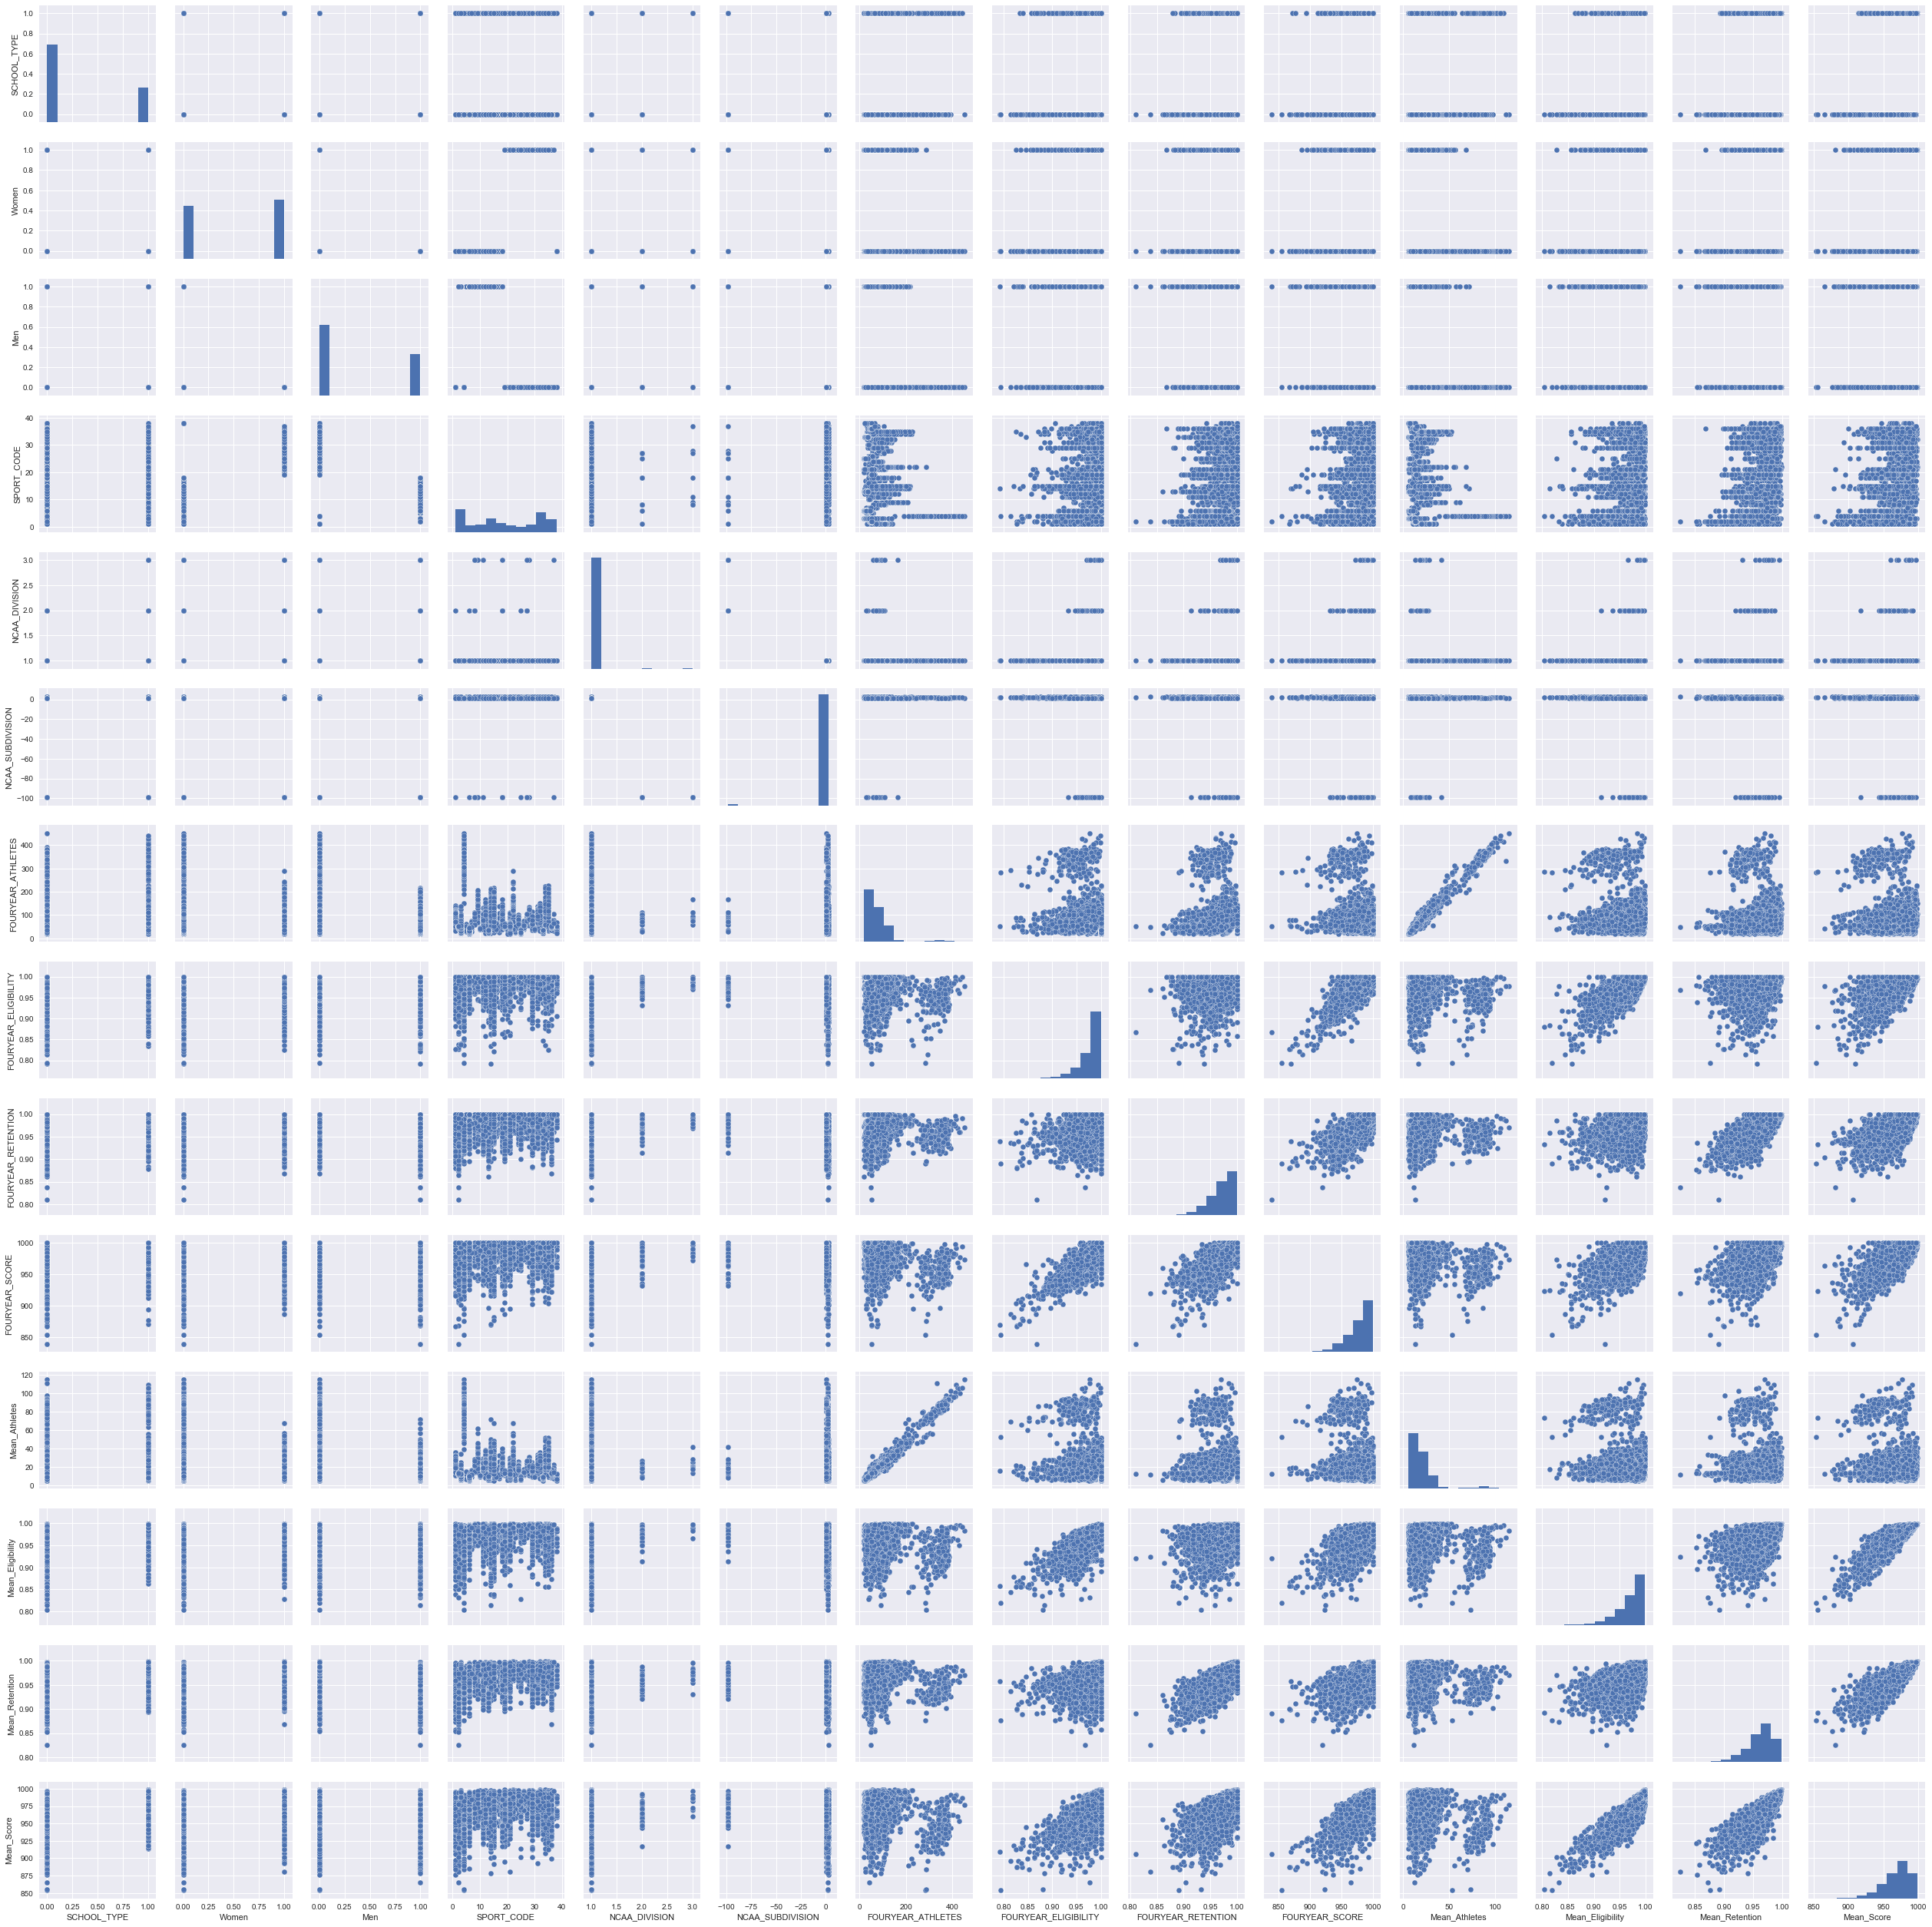

In [16]:
sns.pairplot(df_mean);

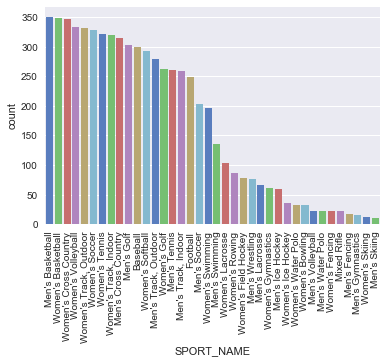

In [17]:
sns.countplot(x="SPORT_NAME", data=raw_data, palette='muted', order = raw_data['SPORT_NAME'].value_counts().index)
plt.xticks(rotation = 90);

### Bivariate correlations

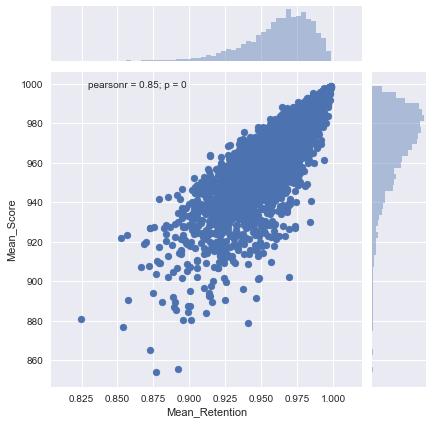

In [18]:
sns.jointplot(x="Mean_Retention", y="Mean_Score", data=df_mean);

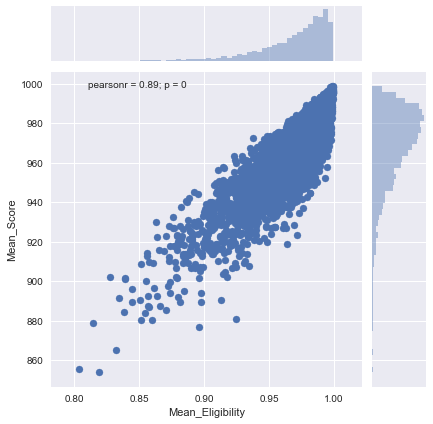

In [19]:
sns.jointplot(x = "Mean_Eligibility", y="Mean_Score", data=df_mean);

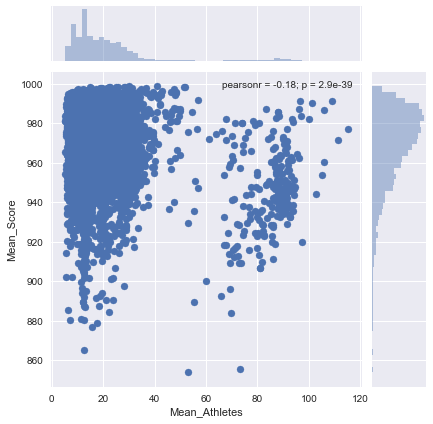

In [20]:
sns.jointplot(x="Mean_Athletes", y="Mean_Score", data=df_mean);

## Modelling

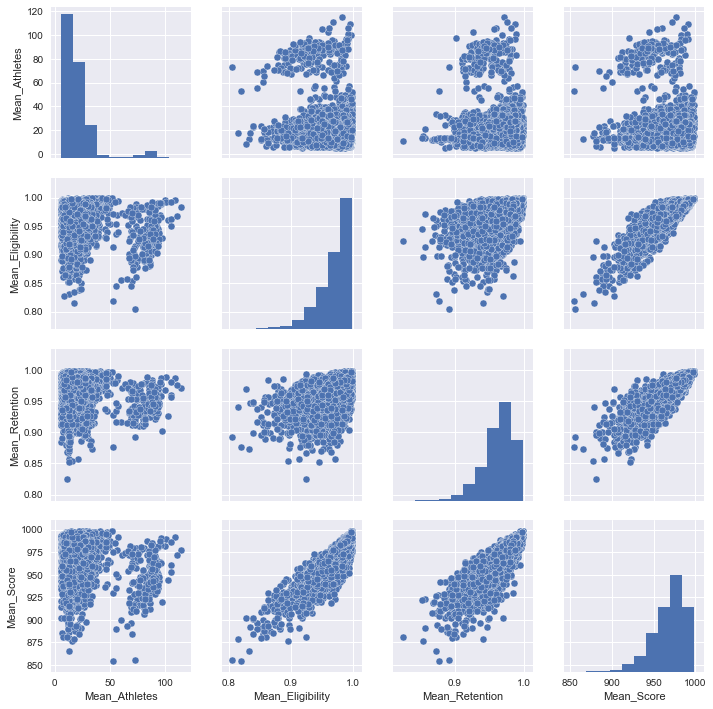

In [21]:
obs = df_mean[['SCHOOL_NAME','SPORT_NAME',
                    'Mean_Athletes', 'Mean_Eligibility', 'Mean_Retention', 'Mean_Score']]

sns.pairplot(obs);

### Logistic Regression using StatsMod

In [23]:
#defining prediction and predictors
df_mean['High_Ret'] = np.where(df_mean['Mean_Retention'] > 0.9, 1, 0)
y = df_mean['High_Ret']
X = df_mean[['Mean_Score', 'Mean_Eligibility']]

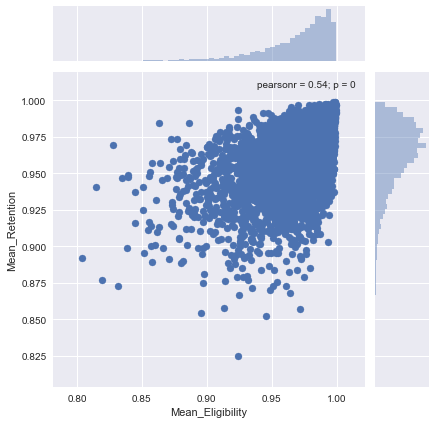

In [24]:
sns.jointplot(x="Mean_Eligibility", y="Mean_Retention", data=df_mean);

In [25]:
#declare predictors: we're seeing if we can predict 
# retention based off mean athletes, score, and eligibility
#df_mean.head(30)

X_statsmod = df_mean[['Mean_Score', 'Mean_Eligibility']]

X_statsmod['intercepts'] = 1

#declare and fit the model:
logit = sm.Logit(df_mean['Mean_Retention'], X_statsmod)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.050202
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Mean_Retention   No. Observations:                 4974
Model:                          Logit   Df Residuals:                     4971
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Sep 2018   Pseudo R-squ.:                -0.03137
Time:                        18:22:15   Log-Likelihood:                -249.71
converged:                       True   LL-Null:                       -242.11
                                        LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Mean_Score           0.0441      0.007      6.412      0.000       0.031       0.058
Mean_Eligib

In [26]:
#calc. accuracy. Get probability
pred_statsmod = result.predict(X_statsmod)

#code retention as 1 if probability of having high retention is greater than .6
pred_y_statsmod = np.where(pred_statsmod < .6, 0, 1)

#accuracy table
table = pd.crosstab(df_mean['High_Ret'], pred_y_statsmod)

print('\nAccuracy by high retention status')
print(table)
print('\nPercentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


Accuracy by high retention status
col_0     0     1
High_Ret         
0         1    70
1         0  4903

Percentage accuracy
0.985926819461


**Our accuracy for this prediction is about 98%**

### Using SKLearn for another logistic regression

In [27]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by retention status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[  0.06776117 -12.26962622]]
[-48.73372588]

 Accuracy by retention status
High_Ret   0     1
row_0             
0          5     0
1         66  4903

 Percentage accuracy
0.986731001206


**This gives us an incrementally more-accurate prediction.**

### Ridge regression

In [28]:
# Generate range of alpha values to pick one resulting in best r squared
#y = df_mean['Mean_Retention']
alphas = np.arange(0.1, 5, 1)
lr_ridge = LogisticRegression(penalty='l2')
ridge_r_squared = []

# Train model with different regularization values
for a in alphas:
    lr_ridge.set_params(C=a, fit_intercept=False)
    lr_ridge.fit(X, y)
    y_pred = lr_ridge.predict(X)
    ridge_r_squared.append(lr_ridge.score(X, y))

In [29]:
# Get alpha corresponding to highest r-squared 
alphas[4]

4.0999999999999996

In [30]:
# Not much variation observed by changing penalization coefficient.  Select best one.
# Instantiate and set regularization coefficient 
lr_ridge = LogisticRegression(penalty='l2', C=5.1, fit_intercept=False)

# Fit model
lr_ridge.fit(X, y)

# Get results
print('Coefficient')
print(lr_ridge.coef_)
print(lr_ridge.intercept_)

# Get predictions
pred_y_r = lr_ridge.predict(X)

print('\nAccuracy by win status')
print(pd.crosstab(pred_y_r, y))

ridge_scores = cross_val_score(lr_ridge, X, y, cv=5)
print('\nPercentage accuracy')
print(ridge_scores)
print('Mean:', ridge_scores.mean())

Coefficient
[[  4.43626862e-03   4.40058504e-06]]
0.0

Accuracy by win status
High_Ret   0     1
row_0             
1         71  4903

Percentage accuracy
[ 0.98493976  0.98592965  0.98592965  0.98591549  0.98591549]
Mean: 0.985726008287


**Accuracy is about the same as previous model.**

### LASSO regression

In [31]:
# Repeat iterative process to find best value of penalization coefficient
# Generate range of alpha values
alphas = np.arange(0.01, 1, 0.1)
lr_lasso = LogisticRegression(penalty='l1')
lasso_r_squared = []
#X['El_Sqrd'] = (X['Mean_Eligibility'])**2
# Train model with different regularization values

for a in alphas:
    lr_lasso.set_params(C=a, fit_intercept=False)
    lr_lasso.fit(X, y)
    y_pred = lr_lasso.predict(X)
    lasso_r_squared.append(lr_lasso.score(X, y))

In [32]:
#Instantiate and set regularization coefficient to selected value
lr_lasso = LogisticRegression(penalty='l1', C=0.9)
#increading coef. increases accuracy 

# Fit model
lr_lasso.fit(X, y)

# Get results
print('Coefficient')
print(lr_lasso.coef_)
print(lr_lasso.intercept_)

# Get predictions
pred_y_l = lr_lasso.predict(X)

print('\nAccuracy by win status')
print(pd.crosstab(pred_y_l, y))

lasso_scores = cross_val_score(lr_lasso, X, y, cv=5)
print('\nPercentage accuracy')
print(lasso_scores)
print('Mean:', lasso_scores.mean())

Coefficient
[[ 0.01844965  0.        ]]
[-13.54189711]

Accuracy by win status
High_Ret   0     1
row_0             
1         71  4903

Percentage accuracy
[ 0.98493976  0.98592965  0.98592965  0.98591549  0.98591549]
Mean: 0.985726008287


**Accuracy is about 98.57%**

In [33]:
#Instantiate and set regularization coefficient to selected value
lr_lasso = LogisticRegression(penalty='l1', C=0.9)
#increading coef. increases accuracy 

# Fit model
X['El_Sqrd'] = (X['Mean_Eligibility'])**2
lr_lasso.fit(X, y)

# Get results
print('Coefficient')
print(lr_lasso.coef_)
print(lr_lasso.intercept_)

# Get predictions
pred_y_l = lr_lasso.predict(X)

print('\nAccuracy by high retention status')
print(pd.crosstab(pred_y_l, y))

lasso_scores = cross_val_score(lr_lasso, X, y, cv=5)
print('\nPercentage accuracy')
print(lasso_scores)
print('Mean:', lasso_scores.mean())

Coefficient
[[ 0.00394275  0.          3.89356349]]
[-3.15342806]

Accuracy by high retention status
High_Ret   0     1
row_0             
1         71  4903

Percentage accuracy
[ 0.98493976  0.98592965  0.98592965  0.98591549  0.98591549]
Mean: 0.985726008287


## Random forest

In [34]:
y = df_mean['Mean_Retention']
X = df_mean[['Mean_Score', 'Mean_Eligibility']]
rfr = ensemble.RandomForestRegressor()
cross_val_score(rfr, X, y, cv=10)

array([ 0.8810667 ,  0.92052012,  0.93915993,  0.91306349,  0.91420048,
        0.95218795,  0.92888715,  0.94903721,  0.8848747 ,  0.90845753])

In [35]:
rfr.fit(X, y)
Y_pred = rfr.predict(X)

In [36]:
print(rfr.feature_importances_)

[ 0.83066651  0.16933349]


In [37]:
rfr.score(X, y)

0.98725134191627617

In [38]:
rfr_scores = cross_val_score(rfr, X, y, cv=10)
print('\nPercentage accuracy')
print(rfr_scores)
print('Mean:', rfr_scores.mean())


Percentage accuracy
[ 0.88183961  0.91929332  0.93639387  0.92016067  0.91163796  0.94999027
  0.92636181  0.94923843  0.88125486  0.91049768]
Mean: 0.918666847804


**Let's try on some different parameters.**

In [39]:
rfr2 = ensemble.RandomForestRegressor(n_estimators=30)
rfr2.fit(X, y)
Y_pred = rfr2.predict(X)
rfr2.score(X, y)

0.98915191745478415

In [40]:
rfr2_scores = cross_val_score(rfr2, X, y, cv=10)
print('\nPercentage accuracy')
print(rfr2_scores)
print('Mean:', rfr2_scores.mean())


Percentage accuracy
[ 0.88488327  0.92640427  0.93681887  0.9171484   0.91399756  0.95519718
  0.93446614  0.95010732  0.8828504   0.91002638]
Mean: 0.921189979326


In [41]:
#add some features -- squared eligibility
# add squared eligibility
X['El_Sqrd'] = (X['Mean_Eligibility'])**2


# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [42]:
rfr3 = ensemble.RandomForestRegressor(n_estimators=30)
rfr3.fit(X_train, y_train)
predict_train = rfr3.predict(X_train)
predict_test = rfr3.predict(X_test)
rfr3.score(X_train, y_train)

0.98908492981165763

In [43]:
rfr3.fit(X_test, y_test)
rfr3.score(X_test, y_test)

0.98610226446394733

In [44]:
rfr3_scores = cross_val_score(rfr3, X_test, y_test, cv=10)
print('\nPercentage accuracy')
print(rfr3_scores)
print('Mean:', rfr3_scores.mean())


Percentage accuracy
[ 0.84158361  0.84365798  0.86618487  0.74621968  0.92473754  0.86227933
  0.90132839  0.94372274  0.8579394   0.90234868]
Mean: 0.869000223448


**Less accurate.**

In [45]:
rfr4 = ensemble.RandomForestRegressor(n_estimators=30)
rfr4.fit(X, y)
Y_pred = rfr4.predict(X)
rfr4.score(X, y)

0.98914340086521113

In [46]:
rfr4_scores = cross_val_score(rfr4, X, y, cv=10)
print('\nPercentage accuracy')
print(rfr4_scores)
print('Mean:', rfr4_scores.mean())


Percentage accuracy
[ 0.88490504  0.92153689  0.93876721  0.91818418  0.91412563  0.95472285
  0.93460589  0.95391687  0.88726597  0.91409397]
Mean: 0.922212448895


# Experimenting with plain LR and a Classifier

## Linear regression

In [47]:
predict_retention = stats.linregress(df_mean['Mean_Score'], df_mean['Mean_Retention'])
predict_retention

LinregressResult(slope=0.00096475960258935779, intercept=0.028483654445296436, rvalue=0.84735761762084949, pvalue=0.0, stderr=8.5743235530742911e-06)

In [48]:
def predict (x):
    return predict_retention.slope * x + predict_retention.intercept

In [49]:
df_mean['Mean_Score'].min()

853.72727272727275

In [50]:
df_mean['Mean_Retention'].min()

0.82464545454545446

In [51]:
predict(500)

0.51086345573997538

In [52]:
print(predict_retention.rvalue ** 2)

0.71801493214


## Gradient boosting

In [53]:
#df_mean.columns
y = df_mean['High_Ret']
X = df_mean[['Mean_Eligibility', 'FOURYEAR_ELIGIBILITY']]
X['El_Sqrd'] = (X['Mean_Eligibility'])**2
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [54]:
# We'll make 90 iterations, use 2-deep trees
params = {'n_estimators': 90,
          'max_depth': 2}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.009830205540661306
Percent Type II errors: 0.00044682752457551384

Test set accuracy:
Percent Type I errors: 0.010040160642570281
Percent Type II errors: 0.01606425702811245


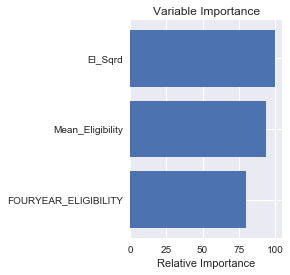

In [55]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [56]:
clf_scores = cross_val_score(clf, X, y, cv=10)
print('\nPercentage accuracy')
print(clf_scores)
print('Mean:', clf_scores.mean())


Percentage accuracy
[ 0.97795591  0.98594378  0.97991968  0.98390342  0.98189135  0.98390342
  0.97987928  0.98390342  0.96981891  0.97384306]
Mean: 0.980096222278


Interestingly, our sqared eligibility is a great predictor for retention. 

## Conclusions

* We can predict retention rates based off eligibility and score with incredible accuracy.

* Teams (and we can assume, athletes) that score better and have higher NCAA eligibility are more likely to have high retention.
